# **Predicting house prices based on structured data and images**

# **1. Dataset description** 

Number of Attributes: 4 textual attributes in addition to the visual attributes that can be extracted from the images.

Attribute Information:
- Number of bedrooms
- Number of bathrooms
- Area (i.e., square footage)
- Zip code

For more info and credits visit:\
https://github.com/emanhamed/Houses-dataset

## Model architecture

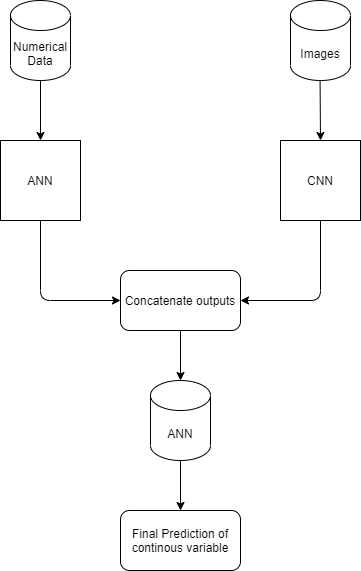

<a id="Libraries"></a> <br>
# **2. Libraries and data** 

In [1]:
import warnings 
warnings.filterwarnings("ignore")
from collections import Counter 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Local data

In [3]:
!gdown https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj
!unzip houses.zip

Downloading...
From: https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj
To: /content/houses.zip
100% 186M/186M [00:02<00:00, 72.3MB/s]
Archive:  houses.zip
  inflating: README.md               
   creating: data/
  inflating: data/49_bathroom.jpg    
  inflating: data/320_bedroom.jpg    
  inflating: data/300_kitchen.jpg    
  inflating: data/259_frontal.jpg    
  inflating: data/169_bedroom.jpg    
  inflating: data/8_kitchen.jpg      
  inflating: data/439_bedroom.jpg    
  inflating: data/419_kitchen.jpg    
  inflating: data/149_kitchen.jpg    
  inflating: data/15_frontal.jpg     
  inflating: data/172_frontal.jpg    
  inflating: data/422_frontal.jpg    
  inflating: data/194_bedroom.jpg    
  inflating: data/242_bedroom.jpg    
  inflating: data/262_kitchen.jpg    
  inflating: data/350_bedroom.jpg    
  inflating: data/229_frontal.jpg    
  inflating: data/370_kitchen.jpg    
  inflating: data/158_bathroom.jpg   
  inflating: data/119_bedroom.jpg    
  inflating: 

In [4]:
filename= './data/HousesInfo.txt'
path = './data/' 

In [5]:
header = ['bedrooms', 'bathrooms', 'area', 'zipcode', 'price']
df = pd.read_csv(filename, header=None, delimiter=' ', names=header)

<a id="Known"></a> <br>
# **3. First look at the data** 

In [6]:
#Searching for null values,data types and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   535 non-null    int64  
 1   bathrooms  535 non-null    float64
 2   area       535 non-null    int64  
 3   zipcode    535 non-null    int64  
 4   price      535 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 21.0 KB


In [7]:
#Looking at unique values
df.nunique()

bedrooms       9
bathrooms     14
area         435
zipcode       49
price        369
dtype: int64

In [8]:
#Looking at a data sample
df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.00,4053,85255,869500
1,4,3.00,3343,36372,865200
2,3,4.00,3923,85266,889000
3,5,5.00,4022,85262,910000
4,3,4.00,4116,85266,971226


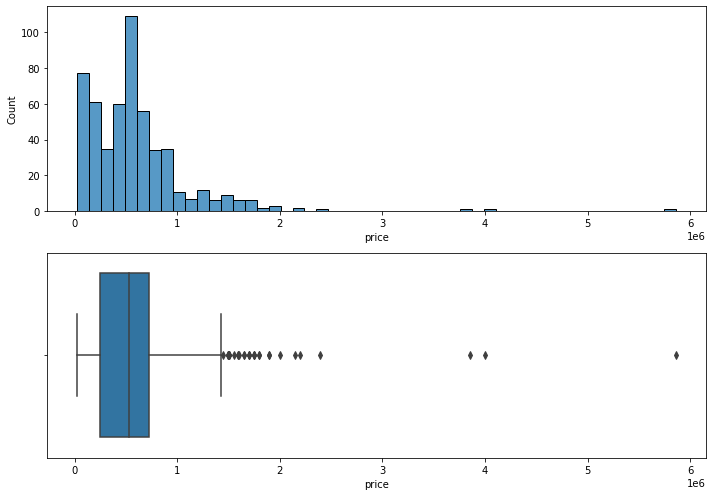

In [9]:
# visualizing target (prices) and identify outliers
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

In [10]:
df = df[df['price']<1500000]

# **4. Feature Engineering** <a id="Feature Engineering"></a> <br>

## Null treatement

In [11]:
# Null treatement

## Treatement of Categorical variables

In [12]:
df['bedrooms'].value_counts()

3     175
4     133
2     123
5      58
6      10
1       5
7       3
8       2
10      1
Name: bedrooms, dtype: int64

In [13]:
df['bathrooms'].value_counts()

2.00    215
3.00     93
2.50     65
4.00     39
3.50     29
1.00     24
1.50     14
5.00     14
4.50     11
6.00      3
3.25      1
7.00      1
5.50      1
Name: bathrooms, dtype: int64

In [14]:
# round bathrooms to full integer values
df['bathrooms'] = df['bathrooms'].round(0)

In [15]:
# Put all zipcodes with few frequencies in Other category
df_zip = df['zipcode'].value_counts().rename_axis('zipcode').reset_index(name='counts')
df_zip['zip_code'] = df_zip['zipcode']
df_zip['zip_code'][df_zip['counts']<2] = 'Other'

# Merge the new zip_code category in the initial dataframe
df = pd.merge(df, df_zip[['zipcode','zip_code']], on=['zipcode'], how='left')
df['zip_code'].value_counts()

92276    100
93510     59
93446     52
92880     49
94501     40
91901     32
94531     22
92677     22
Other     18
92021     11
81524     11
96019     11
85255     10
85266     10
92802      9
95220      8
93111      7
62234      7
85262      6
98021      4
62214      4
60002      3
91752      3
81418      2
62025      2
92692      2
60016      2
92253      2
85377      2
Name: zip_code, dtype: int64

In [16]:
y = df['price']   # Separate target variable
df.drop(['price', 'zipcode'], axis = 1, inplace=True)  # delete unecessary columns

In [17]:
categ = list(df.select_dtypes(['object']).columns | df.select_dtypes(['category']).columns)
print(categ)

['zip_code']


In [18]:
# One hot encoder for Categorical Variables
print('Data frame shape before Categorical Values encoding: ',df.shape)
df = pd.get_dummies(data=df, columns=categ)
print('Data frame shape after Categorical Values encoding: ',df.shape)


Data frame shape before Categorical Values encoding:  (510, 4)
Data frame shape after Categorical Values encoding:  (510, 32)


In [19]:
df.head()

,bedrooms,bathrooms,area,zip_code_60002,zip_code_60016,zip_code_62025,zip_code_62214,zip_code_62234,zip_code_81418,zip_code_81524,zip_code_85255,zip_code_85262,zip_code_85266,zip_code_85377,zip_code_91752,zip_code_91901,zip_code_92021,zip_code_92253,zip_code_92276,zip_code_92677,zip_code_92692,zip_code_92802,zip_code_92880,zip_code_93111,zip_code_93446,zip_code_93510,zip_code_94501,zip_code_94531,zip_code_95220,zip_code_96019,zip_code_98021,zip_code_Other
0,4,4.00,4053,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,3.00,3343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,4.00,3923,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,5.00,4022,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,4.00,4116,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Looking at the correlation of the data

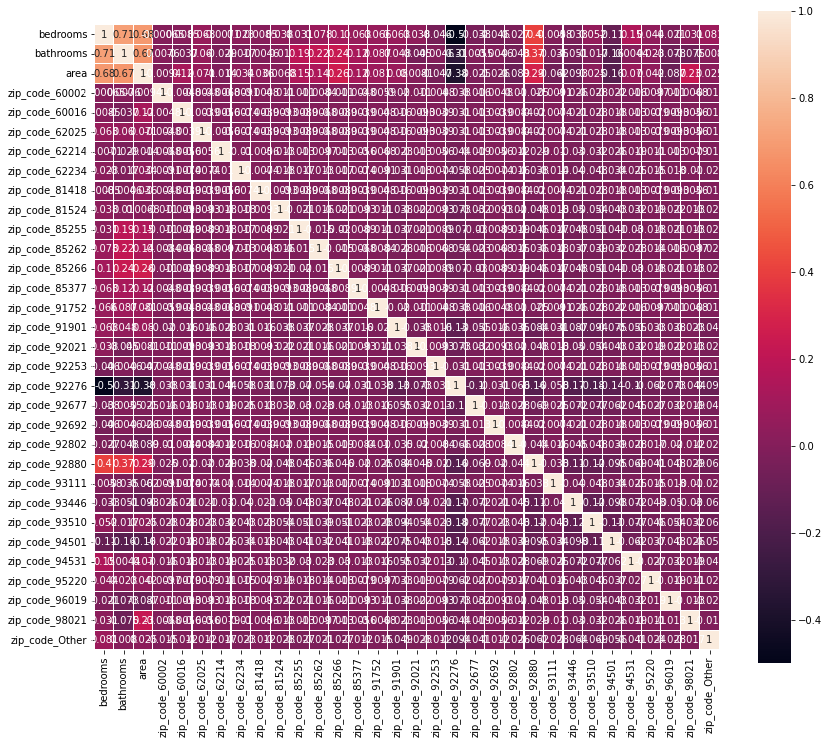

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [21]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(df, 0.9)
print(corr_features)

for column in corr_features:
  df.drop(column, axis=1,inplace=True)

set()


# **5. Train/Test split and Scaling** <a id="Train/Test split and Scaling"></a> <br>


## Import libraries

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## Prepare and split Dataset into Train and Test

In [24]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=42)

## Scale input for distance-based models

In [25]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [26]:
# normalize target
max_price = y_train.max()
y_train = y_train/ max_price
y_test = y_test / max_price

# **6. Implement baseline model** <a id="Implement model"></a> <br>

### Import libraries


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, BatchNormalization

### Define model evaluation function


In [28]:
def model_eval(y_test,y_pred):
  print("Test mean           : {:.2f}".format(np.mean(y_test)))
  print("Price Std (baseline): {:.2f}".format(np.std(y_test)))
  print("Test RMSE           : {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
  print("Test MAE            : {:.2f}".format(mean_absolute_error(y_test,y_pred)))
  print("R² score            : {:.4f}".format(r2_score(y_test,y_pred)))

### Define, compile and train ANN model


In [29]:
#%tensorflow_version 2.x
num_model = Sequential()

num_model.add(Dense(32, activation="relu"))
#num_model.add(Dropout(0.1))

num_model.add(Dense(64, activation="relu"))
num_model.add(Dropout(0.1))

num_model.add(Dense(32, activation="relu"))
#num_model.add(Dropout(0.1))

num_model.add(Dense(8,activation = "relu"))
num_model.add(Dense(1, activation="linear"))

In [30]:
num_model.compile(loss='mse',
              optimizer= 'adam',
              metrics=['mae'])

In [31]:
num_model.fit(X_train_scaled, y_train,
          batch_size = 16, epochs = 100, verbose=1,
          validation_data=(X_test_scaled, y_test))

Epoch 1/100
29/29 [==============================] - 3s 12ms/step - loss: 0.0692 - mae: 0.2018 - val_loss: 0.0156 - val_mae: 0.1026
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0249 - mae: 0.1146 - val_loss: 0.0096 - val_mae: 0.0622
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0191 - mae: 0.0976 - val_loss: 0.0085 - val_mae: 0.0587
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0168 - mae: 0.0879 - val_loss: 0.0092 - val_mae: 0.0570
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0161 - mae: 0.0858 - val_loss: 0.0079 - val_mae: 0.0599
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0155 - mae: 0.0843 - val_loss: 0.0072 - val_mae: 0.0523
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0142 - mae: 0.0801 - val_loss: 0.0075 - val_mae: 0.0546
Epoch 8/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0135 - 

### Predict and evaluate ANN model

In [32]:
y_pred = num_model.predict(X_test_scaled)
y_pred_orig = y_pred * max_price
y_test_orig = y_test * max_price

model_eval(y_test_orig,y_pred_orig)

Test mean           : 499839.20
Price Std (baseline): 262786.56
Test RMSE           : 104267.91
Test MAE            : 74477.01
R² score            : 0.8426


In [33]:
# Look at some examples in validation sample
df_out = pd.DataFrame(y_test_orig)
df_out['baseline_pred'] = pd.DataFrame(y_pred_orig, index=df_out.index)
df_out.head(10)

,price,baseline_pred
480,525000.00,463607.40
449,310000.00,489102.50
475,599900.00,640884.40
434,575000.00,552039.60
368,129900.00,116382.92
55,249900.00,384860.80
322,99900.00,106480.40
76,699999.00,765371.86
504,495000.00,447896.11
347,84900.00,116382.92


<Figure size 720x360 with 0 Axes>

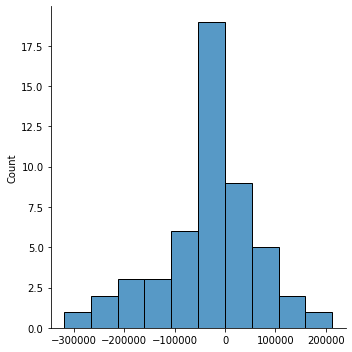

In [34]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (df_out['price'] - df_out['baseline_pred'])
sns.displot(residuals)

# **7. Implement image model** <a id="Implement model"></a> <br>

### Import libraries

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout, Flatten, Activation, Conv2D, BatchNormalization, MaxPooling2D

### Retreive image data

In [36]:
#!gdown https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj
#!unzip houses.zip

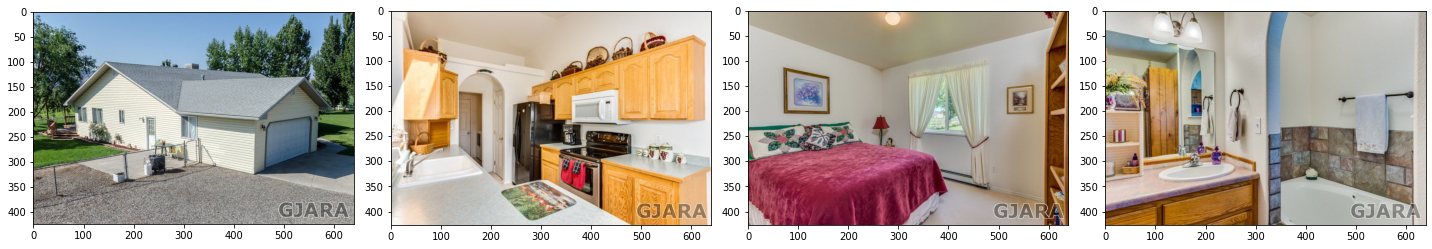

In [37]:
id = 45
types = ['frontal','kitchen','bedroom','bathroom']

f, ax = plt.subplots(1, 4, figsize=(20,20))
for pos, type in zip(range(0,4),types):
  ax[pos].imshow(io.imread('data/'+str(id)+'_'+type+'.jpg'))
plt.tight_layout()
plt.show()

### Process image data

In [38]:
# For each property, concatenate the images from the four categories, based on the prices aligned with the structured data
# Images to be scaled to 50x50x3 (width, height, channels)

images = []
new_size = (100,100)
types = ['frontal','kitchen','bedroom','bathroom']
for i in df.index:
  for type in types:
    img = io.imread('data/'+str(i+1)+'_'+type+'.jpg')
    img = cv2.resize(img, new_size)
    if type=='frontal':
      image = img
    else:
      image =  np.concatenate((image, img), axis=1)  
  images.append(image)  

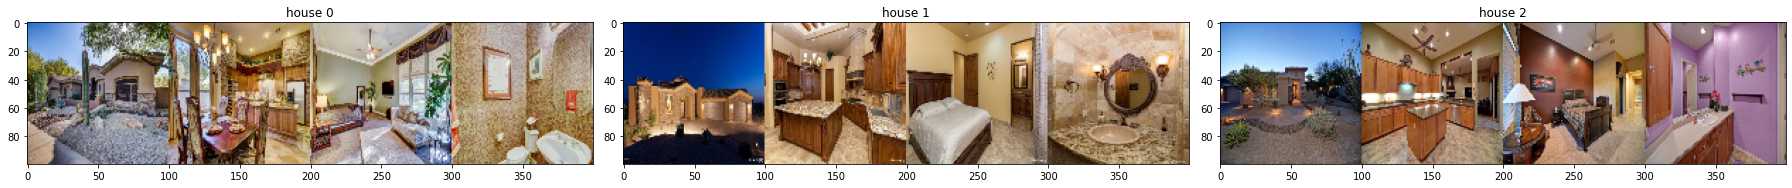

In [39]:
# View the results
f, ax = plt.subplots(1, 3, figsize=(25,25))

for i in range(3): 
  ax[i].imshow(images[i])
  ax[i].set_title('house {}'.format(i))  
plt.tight_layout()
plt.show()

In [40]:
# other concatenation options
images = []
new_size = (100,100)
types = ['frontal','kitchen','bedroom','bathroom']
for i in df.index:
  grid = np.zeros((200, 200, 3), dtype="uint8")
  for type in types:
    img = io.imread('data/'+str(i+1)+'_'+type+'.jpg')
    img = cv2.resize(img, new_size)
    if type=='frontal':
      grid[0:100, 0:100] = img
    if type=='kitchen':
      grid[0:100, 100:200] = img
    if type=='bedroom':
      grid[100:200, 100:200] = img
    if type=='bathroom':
      grid[100:200, 0:100] = img
  images.append(grid)  

### Train/test split image data

In [41]:
X_img = pd.Series(images)
y_img = y

X_train, X_test, y_train, y_test = train_test_split(X_img, y_img, test_size=0.1, random_state=42)

In [42]:
# normalize inputs
X_train_image = np.array(X_train.tolist()).astype('float32') / 255
X_test_image = np.array(X_test.tolist()).astype('float32') / 255

print (X_train_image.shape)

(459, 200, 200, 3)


In [43]:
# normalize target
max_price = y_train.max()
y_train = y_train/ max_price
y_test = y_test / max_price

### Define, compile and train CNN model


In [44]:
#%tensorflow_version 2.x
img_model = Sequential()

img_model.add(Conv2D(32, (1, 1), padding="same", input_shape=(X_train_image.shape[1],X_train_image.shape[2],X_train_image.shape[3], ), activation="relu"))
img_model.add(BatchNormalization(axis=-1))
img_model.add(MaxPooling2D(pool_size=(2, 2)))

img_model.add(Conv2D(64, (1, 1), padding="same", activation="relu"))
img_model.add(BatchNormalization(axis=-1))
img_model.add(MaxPooling2D(pool_size=(2, 2)))

img_model.add(Conv2D(32, (1, 1), padding="same", activation="relu"))
img_model.add(BatchNormalization(axis=-1))
img_model.add(MaxPooling2D(pool_size=(2, 2)))

img_model.add(Flatten())
img_model.add(Dense(64, activation="relu"))
img_model.add(BatchNormalization(axis=-1))
img_model.add(Dropout(0.8))

img_model.add(Dense(32, activation="relu"))
img_model.add(BatchNormalization(axis=-1))
img_model.add(Dropout(0.1))

img_model.add(Dense(8, activation="relu"))
img_model.add(Dense(1, activation="linear"))

In [45]:
img_model.compile(loss='mse',
              optimizer= Adam(learning_rate=1e-2),
              metrics=['mae'])

img_checkpointer = ModelCheckpoint(filepath="img_weights.hdf5", verbose=1, save_best_only=True)

In [46]:
img_model.fit(X_train_image, y_train,
          batch_size = 8, epochs = 100, verbose=1,
          validation_data=(X_test_image, y_test),
          callbacks=[img_checkpointer])

Epoch 1/100
58/58 [==============================] - ETA: 0s - loss: 0.2467 - mae: 0.3522
Epoch 00001: val_loss improved from inf to 5.03033, saving model to img_weights.hdf5
58/58 [==============================] - 31s 35ms/step - loss: 0.2467 - mae: 0.3522 - val_loss: 5.0303 - val_mae: 2.1784
Epoch 2/100
57/58 [============================>.] - ETA: 0s - loss: 0.0761 - mae: 0.2158
Epoch 00002: val_loss improved from 5.03033 to 0.24094, saving model to img_weights.hdf5
58/58 [==============================] - 1s 26ms/step - loss: 0.0756 - mae: 0.2147 - val_loss: 0.2409 - val_mae: 0.4512
Epoch 3/100
57/58 [============================>.] - ETA: 0s - loss: 0.0607 - mae: 0.1952
Epoch 00003: val_loss did not improve from 0.24094
58/58 [==============================] - 1s 24ms/step - loss: 0.0607 - mae: 0.1952 - val_loss: 0.4776 - val_mae: 0.6564
Epoch 4/100
58/58 [==============================] - ETA: 0s - loss: 0.0513 - mae: 0.1759
Epoch 00004: val_loss did not improve from 0.24094
58/

### Predict and evaluate CNN model

In [47]:
img_model.load_weights("img_weights.hdf5")

y_pred = img_model.predict(X_test_image)
y_pred_orig = y_pred * max_price
y_test_orig = y_test * max_price

model_eval(y_test_orig,y_pred_orig)

Test mean           : 499839.20
Price Std (baseline): 262786.56
Test RMSE           : 234239.05
Test MAE            : 189200.16
R² score            : 0.2055


In [48]:
# Look at some examples in validation sample
df_out = pd.DataFrame(y_test_orig)
df_out['cnn_pred'] = pd.DataFrame(y_pred_orig, index=df_out.index)
df_out.head(10)

,price,cnn_pred
480,525000.00,596973.68
449,310000.00,687378.01
475,599900.00,468588.31
434,575000.00,389194.17
368,129900.00,408497.21
55,249900.00,630296.26
322,99900.00,581124.96
76,699999.00,659658.83
504,495000.00,388278.15
347,84900.00,382492.05


<Figure size 720x360 with 0 Axes>

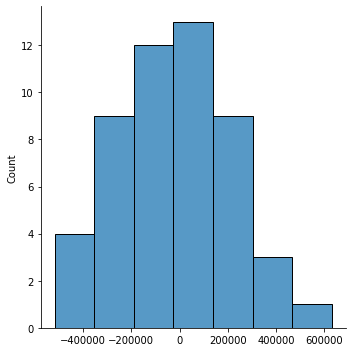

In [49]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (df_out['price'] - df_out['cnn_pred'])
sns.displot(residuals)

# **8. Implement mixed model** <a id="Implement mixed model"></a> <br>

### Import libraries


In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers.merge import concatenate

### Define and re-train mixed model


In [51]:
#%tensorflow_version 2.x
for l in num_model.layers:
  l.trainable = False
  #l.trainable = True

for l in img_model.layers:
  #l.trainable = True
  l.trainable = False

merged = concatenate([num_model.layers[-1].output, img_model.layers[-1].output])
dense = Dense(8, activation="relu")(merged)
output = Dense(1, activation="linear")(dense)

mixed_model = Model(inputs=[num_model.input, img_model.input], outputs=[output])
print (mixed_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_input (InputLayer)      [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 200, 200, 32  128         ['conv2d_input[0][0]']           
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 200, 200, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [52]:
mixed_checkpointer = ModelCheckpoint(filepath="mixed_weights.hdf5", verbose=1, save_best_only=True)

mixed_model.compile(loss='mse',
              optimizer= Adam(learning_rate=1e-2),
              metrics=['mae'])

In [53]:
mixed_model.fit([X_train_scaled, X_train_image], y_train,
          batch_size = 8, epochs = 100, verbose=1,
          validation_data=([X_test_scaled, X_test_image], y_test),
          callbacks=[mixed_checkpointer])

Epoch 1/100
54/58 [==========================>...] - ETA: 0s - loss: 0.0293 - mae: 0.1281
Epoch 00001: val_loss improved from inf to 0.00514, saving model to mixed_weights.hdf5
58/58 [==============================] - 2s 22ms/step - loss: 0.0277 - mae: 0.1231 - val_loss: 0.0051 - val_mae: 0.0542
Epoch 2/100
56/58 [===========================>..] - ETA: 0s - loss: 0.0065 - mae: 0.0543
Epoch 00002: val_loss improved from 0.00514 to 0.00453, saving model to mixed_weights.hdf5
58/58 [==============================] - 1s 16ms/step - loss: 0.0065 - mae: 0.0539 - val_loss: 0.0045 - val_mae: 0.0500
Epoch 3/100
56/58 [===========================>..] - ETA: 0s - loss: 0.0064 - mae: 0.0548
Epoch 00003: val_loss improved from 0.00453 to 0.00432, saving model to mixed_weights.hdf5
58/58 [==============================] - 1s 14ms/step - loss: 0.0065 - mae: 0.0553 - val_loss: 0.0043 - val_mae: 0.0490
Epoch 4/100
55/58 [===========================>..] - ETA: 0s - loss: 0.0068 - mae: 0.0559
Epoch 00004

### Predict and evaluate mixed model

In [54]:
mixed_model.load_weights("mixed_weights.hdf5")
y_pred = mixed_model.predict([X_test_scaled, X_test_image])
y_pred_orig = y_pred * max_price
y_test_orig = y_test * max_price

model_eval(y_test_orig,y_pred_orig)

Test mean           : 499839.20
Price Std (baseline): 262786.56
Test RMSE           : 95727.33
Test MAE            : 71001.01
R² score            : 0.8673


In [55]:
# Look at some examples in validation sample
df_out = pd.DataFrame(y_test_orig)
df_out['final_pred'] = pd.DataFrame(y_pred_orig, index=df_out.index)
df_out.head(10)

,price,final_pred
480,525000.00,447427.88
449,310000.00,480690.07
475,599900.00,588865.72
434,575000.00,498628.31
368,129900.00,102203.92
55,249900.00,371834.30
322,99900.00,90315.91
76,699999.00,727061.40
504,495000.00,406424.58
347,84900.00,103174.36


<Figure size 720x360 with 0 Axes>

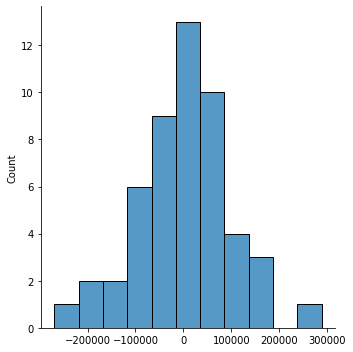

In [56]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (df_out['price'] - df_out['final_pred'])
sns.displot(residuals)

Actual price:     599900.0
Predicted price:  588866.0


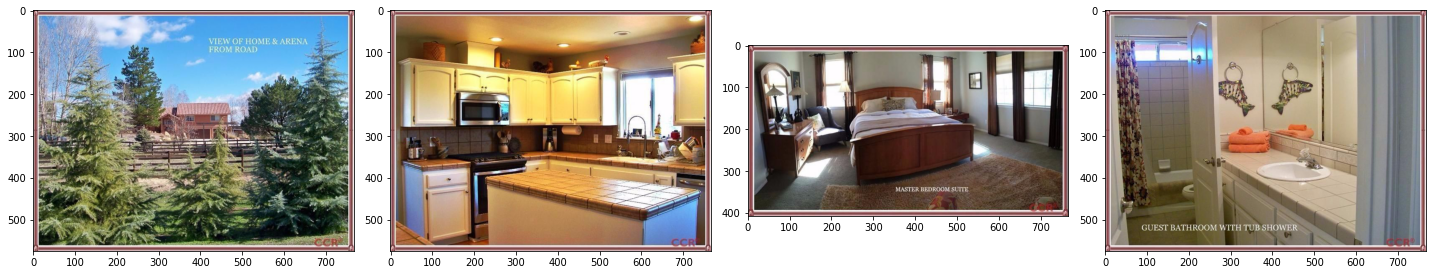

In [57]:
id = 475

print('Actual price:    ', df_out['price'].loc[id].round())
print('Predicted price: ', df_out['final_pred'].loc[id].round())
print('============================')

types = ['frontal','kitchen','bedroom','bathroom']
f, ax = plt.subplots(1, 4, figsize=(20,20))
for pos, type in zip(range(0,4),types):
  ax[pos].imshow(io.imread('data/'+str(id)+'_'+type+'.jpg'))
plt.tight_layout()
plt.show()